In [1]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import datetime as dt

from datetime import datetime, timedelta

from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, boxcox
#For showing plots directly in the notebook run the command below
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.pipeline import Pipeline, make_pipeline
# Gets the public holidays for Ireland
import holidays

## Route Selection parameters

In [2]:
RouteNum = '151' 
RouteTrips = f'{RouteNum}/{RouteNum}_MODELING.csv'
#RouteTrips = f'Route_{RouteNum}_MODELING.csv'
Direction= 2
Model='Lin_Reg'

# Merged Trips and Leavetimes Datasframes

In [3]:
# Reading the Trips csv file, into a data frame
DF_Final = pd.read_csv(RouteTrips)
# Drop the LINEID
DF_Final.drop(columns=['ACTUALTIME_ARR', 'ACTUALTIME_DEP'], inplace=True)
# Show data frame first few rows
DF_Final.head()

,DIRECTION,MONTH,WEEKDAY,HOUR,startStop,endStop,JOURNEYTIME,temp,humidity,wind_speed,precipitation_1h
0,2,1,0,7,4606,7142.0,44,4.11,87,5.66,0.0
1,2,1,0,7,7142,7015.0,96,4.11,87,5.66,0.0
2,2,1,0,7,7015,4617.0,78,4.11,87,5.66,0.0
3,2,1,0,7,4617,4555.0,29,4.11,87,5.66,0.0
4,2,1,0,7,4555,4576.0,62,4.11,87,5.66,0.0


In [4]:
# Separate the dataframe for direction 1
DF_Final_Modelling = DF_Final[DF_Final['DIRECTION']==Direction]

In [5]:
DF_Final_Modelling.shape[0]

757017

In [6]:
DF_Final_Modelling.drop(columns=['DIRECTION'], inplace=True)
DF_Final_Modelling

C:\Users\henry\Anaconda3\envs\COMP47350py38\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MONTH,WEEKDAY,HOUR,startStop,endStop,JOURNEYTIME,temp,humidity,wind_speed,precipitation_1h
0,1,0,7,4606,7142.0,44,4.11,87,5.66,0.0
1,1,0,7,7142,7015.0,96,4.11,87,5.66,0.0
2,1,0,7,7015,4617.0,78,4.11,87,5.66,0.0
3,1,0,7,4617,4555.0,29,4.11,87,5.66,0.0
4,1,0,7,4555,4576.0,62,4.11,87,5.66,0.0
...,...,...,...,...,...,...,...,...,...,...
1461398,12,0,6,4762,4763.0,37,8.86,81,3.10,0.0
1461399,12,0,6,4763,6245.0,57,8.86,81,3.10,0.0
1461400,12,0,6,6245,2156.0,65,8.86,81,3.10,0.0
1461401,12,0,6,2156,6014.0,38,8.86,81,3.10,0.0


C:\Users\henry\Anaconda3\envs\COMP47350py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skew of this distribution is =  2.381573355906824


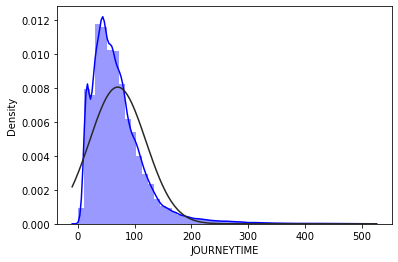

In [7]:
# Analyse the histogram
sns.distplot(DF_Final_Modelling['JOURNEYTIME'], fit = norm, kde = True, color = 'blue')
plt.plot()

print('The skew of this distribution is = ', skew(DF_Final_Modelling['JOURNEYTIME']))

In [8]:
# DF_Final_Modelling['JOURNEYTIME'], fitted_lambda = boxcox(DF_Final_Modelling['JOURNEYTIME'])

In [9]:
# Changing the datatypes of the finalised dataframe
DF_Final_Modelling['MONTH'] = DF_Final_Modelling['MONTH'].astype('category')
DF_Final_Modelling['WEEKDAY'] = DF_Final_Modelling['WEEKDAY'].astype('category')
DF_Final_Modelling['HOUR']= DF_Final_Modelling['HOUR'].astype('category')
DF_Final_Modelling['startStop'] = DF_Final_Modelling['startStop'].astype('category')
DF_Final_Modelling['endStop'] = DF_Final_Modelling['endStop'].astype('category')
DF_Final_Modelling['JOURNEYTIME'] = DF_Final_Modelling['JOURNEYTIME'].astype('float')
DF_Final_Modelling['temp'] = DF_Final_Modelling['temp'].astype('int')
DF_Final_Modelling['humidity'] = DF_Final_Modelling['humidity'].astype('int')
DF_Final_Modelling['wind_speed'] = DF_Final_Modelling['wind_speed'].astype('int')

DF_Final_Modelling['precipitation_1h'] = DF_Final_Modelling['precipitation_1h'].astype('int')


<ipython-input-9-10fc7e2e95ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Final_Modelling['MONTH'] = DF_Final_Modelling['MONTH'].astype('category')
<ipython-input-9-10fc7e2e95ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Final_Modelling['WEEKDAY'] = DF_Final_Modelling['WEEKDAY'].astype('category')
<ipython-input-9-10fc7e2e95ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# Regression for Each StopPair

In [10]:
# Reset the index of the finalised dataframe
DF_Final_Modelling.reset_index(inplace= True, drop=True)

DF_Final_Modelling.shape[0]

757017

In [11]:
# Sorting on teh unique stops
stops = sorted(list(DF_Final_Modelling['startStop'].unique()))

In [12]:
# Arranging the final parameters in a stops dictionary
DF_Dictionary = {}

for stop in stops:
    DF_Dictionary[stop] =  DF_Final_Modelling[DF_Final_Modelling['startStop']== stop]
                                           
DF_Dictionary

{297:        MONTH WEEKDAY HOUR startStop endStop  JOURNEYTIME  temp  humidity  \
 41         1       0    8       297   407.0        129.0     4        87   
 129        1       0    8       297   407.0        156.0     4        87   
 175        1       0    9       297   407.0        130.0     4        87   
 224        1       0    9       297   407.0        113.0     4        87   
 236        1       0   10       297   407.0        103.0     5        81   
 ...      ...     ...  ...       ...     ...          ...   ...       ...   
 756762    12       0   19       297   407.0         95.0     9        76   
 756811    12       0   19       297   407.0        140.0     9        76   
 756822    12       0   20       297   407.0        110.0     9        81   
 756910    12       0   22       297   407.0        139.0     9        81   
 756919    12       0   21       297   407.0         87.0     9        81   
 
         wind_speed  precipitation_1h  
 41               6          

In [13]:
# generating the test train dictionary for target feature JOURNEYTIME
X_trainDict = {}
y_trainDict = {}
X_testDict = {}
y_testDict = {}

remove = []

for stop in stops:
        
    y = DF_Dictionary[stop]['JOURNEYTIME']
    X = DF_Dictionary[stop].drop(['JOURNEYTIME', 'startStop', 'endStop'], 1)
    
    
    if X.shape[0] < 3:
        print(f'{stop} too small')
        remove.append(stop)
        continue
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    
    X_trainDict[stop] = X_train
    X_testDict[stop] = X_test
    y_trainDict[stop] = y_train
    y_testDict[stop] = y_test
    
    
    # need to reset the index to allow concatatenation with predicted values otherwise not joining on same index...
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    #print(X_train)
    
for i in remove:
    stops.remove(i)

In [14]:
# Modelling for each stop pair
modelDict = {}


for stop in stops:
    #print(f'Modelling stop number {stop}.')
  
    X_train = X_trainDict[stop]        
    X_test = X_testDict[stop]
    y_train = y_trainDict[stop]
    y_test = y_testDict[stop]
    
    # Improvement Strategy1: Perform a Polynomial Features Transform of the Dataset
    
    #poly = PolynomialFeatures(3)
    #model = LinearRegression()
    #pipe = Pipeline([('Polynomial_Features', poly), ('Linear_regression', model)])
    #modelDict[stop] = pipe.fit(X_train, y_train)
    
    # Improvement Strategy2: Use L1 regularisation (Ridge Regression) and iteratively optomise alpha
    
    # Find optimal alpha with grid search, in this model it was found to be 1000 (Route 70)
    #alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    #param_grid = dict(alpha=alpha)
    #model =  Ridge(alpha=1000)
    #grid = GridSearchCV(model, param_grid=param_grid, scoring='r2', n_jobs=-1)
    #modelDict[stop] = grid.fit(X_train, y_train)
    #print('Best Score: ', modelDict[stop].best_score_)
    #print('Best Params: ', modelDict[stop].best_params_)
    
    #TRAIN the Model with Optomised Value
    #modelDict[stop] = model.fit(X_train, y_train)
    
    # Improvement Strategy2: Use L2 regularisation (lasso Regression) and iteratively optomise alpha
    
    # Find optimal alpha with grid search, in this model it was found to be 0.1 (Route 70)
    #alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    #param_grid = dict(alpha=alpha)
    #model =  Lasso(alpha=0.1)
    #grid = GridSearchCV(model, param_grid=param_grid, scoring='r2', n_jobs=-1)
    #modelDict[stop] = grid.fit(X_train, y_train)
    #print('Best Score: ', modelDict[stop].best_score_)
    #print('Best Params: ', modelDict[stop].best_params_)
    
    #TRAIN the Model with Optomised Value
    #modelDict[stop] = model.fit(X_train, y_train)
    
    # Improvement Strategy3: Use Elastic-net linear regression model that combines the penalties of Lasso and Ridge
    
    # Find optimal alpha with grid search, in this model it was found that alpha=0.1 and l1_ratio=0.5 (Route 70)
    #alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    
    #l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    #param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
    #model =  ElasticNet(alpha=0.1, l1_ratio=0.5)
    #grid = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
    
    model =  LinearRegression()
    modelDict[stop] = model.fit(X_train, y_train)
    
    #print('Best Score: ', modelDict[stop].best_score_)
    #print('Best Params: ', modelDict[stop].best_params_)
    
    
    # Pickle Files Creation
    endStop = int(DF_Final_Modelling[DF_Final_Modelling['startStop']==stop]['endStop'].mode())
    
    filename = f'{RouteNum}/dir{Direction}/FROM_{stop}_TO_{endStop}.sav'
    pickle.dump(modelDict[stop], open(filename,'wb'))
    

In [15]:
#Defining MAPE function
def MAPE(testActualVal,predictions):
    mape = np.mean(np.abs((testActualVal - predictions)/testActualVal))*100
    return mape

In [16]:
#This function is used repeatedly to compute all metrics
def printStopMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    print("MAPE: ", metrics.mean_absolute_percentage_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    print('\n==============================================================================\n')

In [17]:
# Getting the actual vs predicted values for the training data and writing to a csv file
for stop in stops:
    print(f'Modelling stop number {stop}.')
  
    X_train = X_trainDict[stop]
    y_train = y_trainDict[stop]
    
    train_predictions = modelDict[stop].predict(X_train)
    print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
    printStopMetrics(y_train, train_predictions)
    
    # Write Information to File
    with open(f'{RouteNum}/{RouteNum}_Direction_{Direction}_train_predictions_{Model}_Regression.csv','a') as fh:
        fh.write('\n\n=========================================================='+\
                f'\nMetrics for stop model number {stop}:'
                f'\nMAE:{metrics.mean_absolute_error(y_train, train_predictions)}'+\
                f'\nMAPE:{metrics.mean_absolute_percentage_error(y_train, train_predictions)}'
                f'\nRMSE:{metrics.mean_squared_error(y_train, train_predictions)**0.5}'+\
                f'\nR2:{metrics.r2_score(y_train, train_predictions)}') 
                 

Modelling stop number 297.
Actual vs predicted on training:
        JOURNEYTIME   Predicted
0             80.0  104.961660
1             72.0  108.889913
2             74.0   97.483639
3            110.0   99.384215
4            113.0  102.660765
...            ...         ...
10558         77.0   95.511729
10559         71.0  113.000336
10560        113.0  101.488722
10561         82.0  107.032661
10562        261.0  122.594258

[10563 rows x 2 columns]

MAE:  38.93542062665638
MAPE:  0.47531300188235803
RMSE:  50.00217784059001
R2:  0.016903411256444456


Modelling stop number 407.
Actual vs predicted on training:
        JOURNEYTIME  Predicted
0             82.0  79.396632
1             21.0  78.228432
2             95.0  74.627232
3             78.0  76.804411
4             91.0  61.398318
...            ...        ...
10350         77.0  69.028926
10351         56.0  81.736254
10352         69.0  79.273634
10353         28.0  74.666312
10354         46.0  66.471886

[10355 rows x 

MAPE:  20234856919482.06
RMSE:  17.624979262574946
R2:  0.07541705067526216


Modelling stop number 2380.
Actual vs predicted on training:
        JOURNEYTIME  Predicted
0             41.0  43.794288
1             49.0  43.233197
2             28.0  27.287195
3             37.0  32.492050
4             11.0  26.537237
...            ...        ...
11261         36.0  28.664687
11262         17.0  43.036171
11263         34.0  40.456649
11264         83.0  46.810962
11265         24.0  25.820107

[11266 rows x 2 columns]

MAE:  17.40809697145443
MAPE:  14875954020956.35
RMSE:  21.883206555828103
R2:  0.1206939064560919


Modelling stop number 2382.
Actual vs predicted on training:
        JOURNEYTIME  Predicted
0             24.0  34.629213
1             15.0  28.866413
2             18.0  35.170481
3             54.0  35.045656
4             17.0  29.244683
...            ...        ...
11080         37.0  32.645018
11081         13.0  22.617151
11082         44.0  29.688389
11083     

R2:  0.4878558416740353


Modelling stop number 4576.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            87.0  85.122795
1            88.0  73.820965
2           100.0  83.235848
3            94.0  77.933956
4            83.0  80.205155
...           ...        ...
9033         73.0  79.315100
9034        100.0  83.235848
9035         45.0  82.581535
9036         78.0  77.283306
9037         66.0  81.254994

[9038 rows x 2 columns]

MAE:  20.788650608612592
MAPE:  0.30524709053676513
RMSE:  25.118611602681348
R2:  0.02227330966313168


Modelling stop number 4606.
Actual vs predicted on training:
        JOURNEYTIME  Predicted
0             23.0  65.981544
1            127.0  66.274448
2             99.0  66.269657
3             67.0  75.513781
4             26.0  73.777242
...            ...        ...
10314         30.0  65.827541
10315         45.0  70.418993
10316         69.0  70.422042
10317        108.0  63.134070
10318          6.0  61.861467

[10319 row

Actual vs predicted on training:
        JOURNEYTIME  Predicted
0             62.0  65.489641
1             41.0  62.300639
2             96.0  63.242796
3             82.0  71.673021
4             51.0  70.934537
...            ...        ...
10792         53.0  52.122388
10793         41.0  59.923771
10794         53.0  54.139269
10795         59.0  51.279715
10796         67.0  69.556380

[10797 rows x 2 columns]

MAE:  17.847581480289907
MAPE:  22716334608359.22
RMSE:  23.037319686502958
R2:  0.12391815032012798


Modelling stop number 6245.
Actual vs predicted on training:
        JOURNEYTIME  Predicted
0            102.0  74.631970
1             44.0  66.988280
2             75.0  85.186649
3             90.0  75.920884
4             64.0  68.107459
...            ...        ...
10908         50.0  69.488272
10909         73.0  88.673770
10910         66.0  75.021729
10911         80.0  83.568580
10912         79.0  76.956798

[10913 rows x 2 columns]

MAE:  12.175967516957103
MA

In [18]:
# Getting the actual vs predicted values for the test data and writing to a csv file
for stop in stops:
    print(f'Modelling stop number {stop}.')
  
    X_test = X_testDict[stop]
    y_test = y_testDict[stop]
    
    test_predictions = modelDict[stop].predict(X_test)
    print("Actual vs predicted on training:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))
    printStopMetrics(y_test, test_predictions)
    
    # Write Information to File
    with open(f'{RouteNum}/{RouteNum}_Direction_{Direction}_test_predictions_{Model}_Regression.csv','a') as fh:
        fh.write('\n\n=========================================================='+\
                f'\nMetrics for stop model number {stop}:'
                f'\nMAE:{metrics.mean_absolute_error(y_test, test_predictions)}'+\
                f'\nMAPE:{metrics.mean_absolute_percentage_error(y_test, test_predictions)}'
                f'\nRMSE:{metrics.mean_squared_error(y_test, test_predictions)**0.5}'+\
                f'\nR2:{metrics.r2_score(y_test, test_predictions)}') 

Modelling stop number 297.
Actual vs predicted on training:
       JOURNEYTIME   Predicted
0           115.0  109.727833
1            88.0   95.158499
2            98.0  116.579165
3            79.0  112.118622
4            87.0  101.262987
...           ...         ...
4522         94.0   98.732198
4523         71.0  104.406640
4524         51.0  104.091160
4525        122.0  104.566778
4526         75.0   95.108460

[4527 rows x 2 columns]

MAE:  38.22529315362283
MAPE:  0.4663325294138852
RMSE:  49.027608043966005
R2:  0.015791734376834343


Modelling stop number 407.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            34.0  61.579421
1            64.0  82.461109
2            47.0  73.524854
3            48.0  72.365677
4            52.0  62.200182
...           ...        ...
4433         85.0  75.495341
4434         48.0  62.586439
4435         41.0  73.063971
4436         72.0  69.669618
4437         56.0  66.191250

[4438 rows x 2 columns]

MAE:  25.70893

Actual vs predicted on training:
       JOURNEYTIME   Predicted
0           212.0  243.393869
1           319.0  289.341023
2           134.0  284.429559
3           202.0  276.206927
4           397.0  238.404876
...           ...         ...
4617        278.0  279.900761
4618        285.0  299.325064
4619        192.0  216.298549
4620        173.0  195.583110
4621        215.0  290.939227

[4622 rows x 2 columns]

MAE:  61.73079184901617
MAPE:  0.25919878934239576
RMSE:  79.23774117892332
R2:  0.12714976994097515


Modelling stop number 2498.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            45.0  34.082960
1            54.0  54.368406
2            73.0  43.561047
3            93.0  48.250531
4            48.0  43.540045
...           ...        ...
4350         20.0  50.840665
4351         19.0  54.046365
4352         46.0  59.483041
4353         66.0  34.740987
4354        114.0  59.616320

[4355 rows x 2 columns]

MAE:  21.391241058303432
MAPE:  0.6082800

       JOURNEYTIME  Predicted
0            67.0  73.894547
1            42.0  70.242569
2            59.0  61.583465
3            37.0  65.695403
4            40.0  63.104071
...           ...        ...
4418         47.0  66.447600
4419         85.0  69.677208
4420         92.0  70.829195
4421        100.0  62.704150
4422         83.0  65.096179

[4423 rows x 2 columns]

MAE:  30.844746156077267
MAPE:  199748470056555.94
RMSE:  43.31835842885465
R2:  0.008828690008251039


Modelling stop number 4617.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            14.0  19.146787
1            11.0  15.831684
2            13.0  17.987358
3            13.0  14.566574
4            46.0  17.708178
...           ...        ...
4547         11.0  17.335850
4548         29.0  15.082995
4549          8.0  17.311443
4550         11.0  11.926763
4551         10.0  15.831684

[4552 rows x 2 columns]

MAE:  8.972922038404292
MAPE:  0.5936922086219246
RMSE:  10.956384530981714
R2:  0.05

[4628 rows x 2 columns]

MAE:  17.777823245774137
MAPE:  0.3774244968626298
RMSE:  23.227683174971006
R2:  0.1150423701642892


Modelling stop number 6245.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            73.0  80.776502
1            75.0  73.235944
2           116.0  88.741962
3            78.0  84.784430
4            98.0  91.181394
...           ...        ...
4673         47.0  67.758833
4674         85.0  83.048447
4675         78.0  80.576416
4676         64.0  70.137121
4677         63.0  83.601216

[4678 rows x 2 columns]

MAE:  12.003109734257663
MAPE:  0.1624258279205744
RMSE:  15.126076534770304
R2:  0.23029575809401182


Modelling stop number 7015.
Actual vs predicted on training:
       JOURNEYTIME  Predicted
0            79.0  85.856942
1            90.0  84.571402
2            75.0  88.277808
3            96.0  86.297377
4            74.0  90.615927
...           ...        ...
4663         81.0  91.959705
4664         83.0  90.660785
4665     